In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')


In [242]:
from google.colab import files
uploaded = files.upload()

Saving combined_dataset.csv to combined_dataset.csv


In [243]:
df = pd.read_csv('combined_dataset.csv')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [244]:
df.replace({'male': 0, 'female': 1},
		inplace=True)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [245]:
df.shape

(15000, 9)

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.0 MB


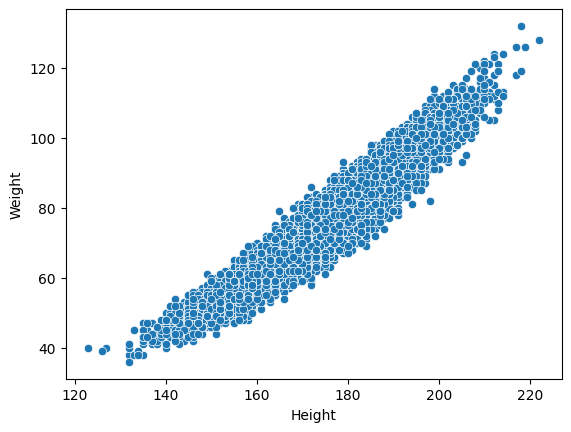

In [247]:
sb.scatterplot(x=df['Height'], y=df['Weight'])
plt.show()

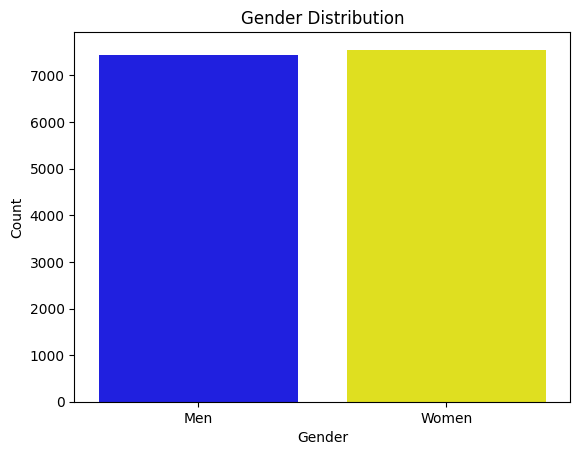

In [248]:
sb.countplot(x='Gender', data=df, palette=['blue', 'yellow'])

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Men', 'Women'])

plt.show()

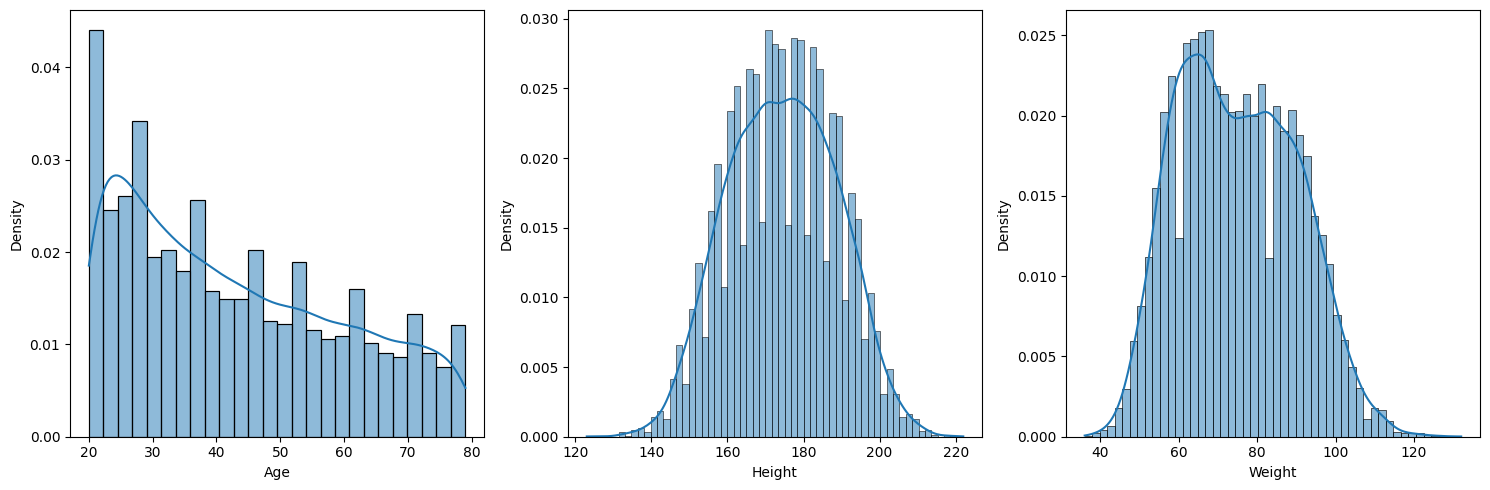

In [249]:
selected_features = ['Age', 'Height', 'Weight']

plt.subplots(figsize=(15, 5))

for i, col in enumerate(selected_features):
    plt.subplot(1, 3, i + 1)
    sb.histplot(df[col], kde=True, stat="density")

plt.tight_layout()
plt.show()


In [250]:
features = df.drop(['User_ID', 'Calories'], axis=1)
target = df['Calories'].values

X_train, X_val, Y_train, Y_val = train_test_split(features, target,
                                                  test_size=0.2, random_state=2)
X_train.shape, X_val.shape

((12000, 7), (3000, 7))

In [251]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

models = [LinearRegression(), XGBRegressor(), Lasso(), RandomForestRegressor(), Ridge()]

for model in models:
    model.fit(X_train, Y_train)
    model_name = str(model).split('(')[0]

    print(f'{model_name} : ')

    train_preds = model.predict(X_train)
    print('Training Error (MAE): ', mae(Y_train, train_preds))
    print('Training Error (MSE): ', mse(Y_train, train_preds))
    print('Training Error (RMSE): ', mse(Y_train, train_preds, squared=False))
    print('Training R-squared: ', r2_score(Y_train, train_preds))

    val_preds = model.predict(X_val)
    print('Validation Error (MAE): ', mae(Y_val, val_preds))
    print('Validation Error (MSE): ', mse(Y_val, val_preds))
    print('Validation Error (RMSE): ', mse(Y_val, val_preds, squared=False))
    print('Validation R-squared: ', r2_score(Y_val, val_preds))

    print()

LinearRegression : 
Training Error (MAE):  8.33298522989675
Training Error (MSE):  127.4214088420092
Training Error (RMSE):  11.288109179220815
Training R-squared:  0.9672762198112508
Validation Error (MAE):  8.385188053147187
Validation Error (MSE):  130.08707386188374
Validation Error (RMSE):  11.405572053250276
Validation R-squared:  0.9668790377181355

XGBRegressor : 
Training Error (MAE):  0.9322033420062313
Training Error (MSE):  1.6776731334332036
Training Error (RMSE):  1.2952502203949643
Training R-squared:  0.9995691477017405
Validation Error (MAE):  1.4833678883314132
Validation Error (MSE):  4.710710012461346
Validation Error (RMSE):  2.1704170134933394
Validation R-squared:  0.998800624504713

Lasso : 
Training Error (MAE):  8.755759719264127
Training Error (MSE):  138.39508628024868
Training Error (RMSE):  11.76414409467381
Training R-squared:  0.9644580104411407
Validation Error (MAE):  8.731270698038779
Validation Error (MSE):  139.87373893332676
Validation Error (RMSE)

In [252]:
# Вилучення навченої моделі XGBRegressor
xgb_model = models[1]

In [253]:
import numpy as np

# Приклад даних про тренування
data1 = [1, 20, 166, 60, 14, 94, 40.3]
data2 = [0, 68, 190, 94, 29, 105, 40.8]
# Перетворення даних у формат, що підходить для моделі
data1 = np.array(data1).reshape(1, -1)
data2 = np.array(data2).reshape(1, -1)
# Передбачення за допомогою моделі
predicted_calories1 = xgb_model.predict(data1)
predicted_calories2 = xgb_model.predict(data2)
print("Прогнозована кількість спалених калорій:", predicted_calories1[0])
print("Прогнозована кількість спалених калорій:", predicted_calories2[0])

Прогнозована кількість спалених калорій: 65.85351
Прогнозована кількість спалених калорій: 236.13371
